#  <center><u>LINEAR REGRESSION<u><center>

In [45]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [46]:
%matplotlib inline



In [47]:
# Import the data

df = pd.read_csv('/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [48]:
#drop radio and newspaper column
df = df.drop(['Radio','Newspaper'],axis=1)

In [49]:
# View the dimensions of df

df.shape


(200, 2)

In [50]:
# View the top 5 rows of df
df.head(5)


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [51]:
# View dataframe summary
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [52]:
# View descriptive statistics

df.describe()


,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [53]:
# Declaring TV as X(Independent) variable  and sales as Y(dependent variable) 

# TV and Sales data values are given by X and y respectively.

X = df.loc[:,['TV']]

Y = df.loc[:,["Sales"]]


Text(0.5, 1.0, 'Scatter plot between TV and Sales Variable')

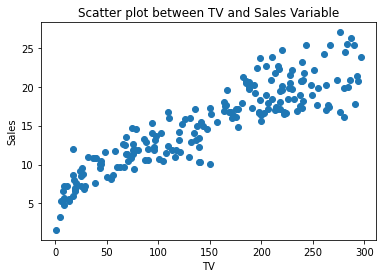

In [54]:
# Scatter plot to see relationship between Tv and sales
plt.scatter(X,Y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Scatter plot between TV and Sales Variable")


Here we can notice that there is some sort of positive relationship between TV and Sales as we can see that when the Value of Tv advertisement increases Sales also increase

# Visualising Data Using Seaborn


### **`Reference video below for pairplot and reshaping`**



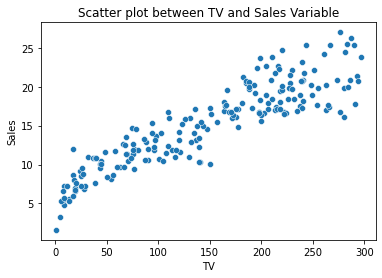

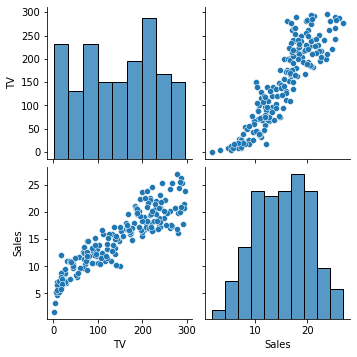

In [55]:
# Visualise the relationship between the features and the response using scatterplots

sns.scatterplot(x="TV",y="Sales",data=df)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Scatter plot between TV and Sales Variable")

# plot a pairplot also for df

sns.pairplot(df)



The above graph also shows positive linear relation between both TV and Sales.

In [56]:
# Printing the dimensions of X and y
print(X.shape)
print(Y.shape)



(200, 1)
(200, 1)


In [57]:
# Reshaping X and Y into array

X = X.values.reshape(-1,1)

Y = Y.values.reshape(-1)



In [58]:
# Print the dimensions of X and y after reshaping
X.shape
Y.shape



(200,)

# Performing Simple Linear Regression

In [59]:
# import train test split
from sklearn.model_selection import train_test_split

# Split X and y into training and test data sets


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state = 42)



In [60]:
# print shapes of X_train,Y_train, X_test, Y_test

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(180, 1)
(180,)
(20, 1)
(20,)


In [61]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,Y_train)



# Predict on the test data
Y_pred = lm.predict(X_test)
Y_pred

array([16.04807507, 17.81783251, 23.19326401,  7.68996824, 19.19063502,
       11.18537703, 18.99767081,  9.801548  , 19.30641354, 16.69864011,
        8.78159433, 10.14337031, 19.97351838,  7.34263267, 14.73591845,
       16.42849022,  7.44738467, 17.9391243 , 11.19640356, 20.13340301])

In [80]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_

# also print a and b
print("The Model slope is",a)
print("The model intercept is",b)
print(f"Equation of line = y{a}+{b}")

The Model slope is [0.05513263]
The model intercept is 7.044916461655207
Equation of line = y[0.05513263]+7.044916461655207


Wohoo! Awesome job done! 

## Making predictions


To make prediction, on an individual TV value, 


		lm.predict(Xi)
        

where Xi is the TV data value of the ith observation.



<p style='text-align: right;'> 2 points</p>


In [72]:
# Predicting Sales values on first five 5 TV  datasets only
Xi = X[0:5]
lm.predict(Xi)




array([19.7309348 ,  9.49831853,  7.99319771, 15.39751002, 17.0128961 ])

In [71]:
# prediction for all X present in the dataset
lm.predict(X)



array([19.7309348 ,  9.49831853,  7.99319771, 15.39751002, 17.0128961 ,
        7.52457035, 10.21504273, 13.67185868,  7.51905709, 18.06041609,
       10.68918336, 18.88189229,  8.35707307, 12.42034796, 18.2974864 ,
       17.81783251, 10.78290883, 22.55923876, 10.86009451, 15.16595297,
       19.08588302, 20.13340301,  7.77266719, 19.63169607, 10.47967936,
       21.53928509, 14.9233694 , 20.28226111, 20.761915  , 10.93728019,
       23.19326401, 13.26939048, 12.40380817, 21.68814319, 12.32110923,
       23.07197223, 21.75981561, 11.16332398,  9.42113285, 19.61515628,
       18.20927419, 16.80339211, 23.23185685, 18.45185777,  8.42874549,
       16.69864011, 11.99031344, 20.27123458, 19.57105017, 10.73328946,
       18.06041609, 12.58023259, 18.97561776, 17.11213484, 21.52825856,
       18.01079672,  7.44738467, 14.55398077, 18.66687503, 18.66136176,
        9.99451221, 21.45107288, 20.238155  , 12.70703764, 14.27280436,
       10.84906798,  8.78159433, 14.72489193, 20.13340301, 18.99

In [74]:
# Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print("RMSE Value ",rmse)



RMSE Value  2.5103822386472214


In [75]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
r2score = r2_score(Y_test,Y_pred)
print("R2 Score value: " ,r2score)



R2 Score value:  0.8071768727953934


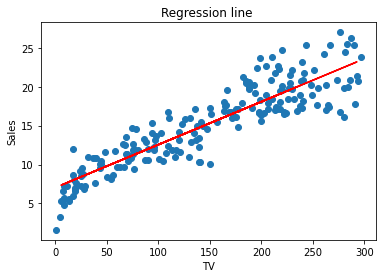

In [79]:
# Plot the Regression Line between X and Y as shown in below output.
plt.scatter(X,Y)
plt.plot(X_test,Y_pred,color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Regression line ")
plt.show()


Text(0.5, 1.0, 'Residual errors')

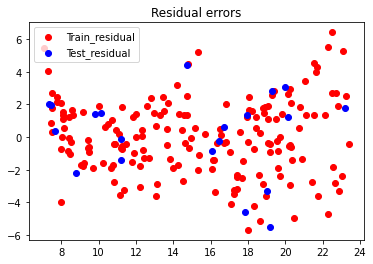

In [86]:
# Plotting residual errors
train_residual = lm.predict(X_train)-Y_train
test_residual = lm.predict(X_test)-Y_test

plt.scatter(lm.predict(X_train),train_residual,color="red")
plt.scatter(lm.predict(X_test),test_residual,color="blue")
plt.legend(["Train_residual","Test_residual"])
plt.title("Residual errors")
